<img align="right" src="https://druggablegenome.net/sites/default/files/IDGLOGO.png" width="400">

# TCRD Introduction

<br>
<br>

 Author : Swasti Tenkila Purushotham       
 Title and Affiliation : Graduate Research Assistant, UNM School of Medicine, Department     of Internal Medicine, Translational Informatics Division <br>
Date : 6/15/2023



The National Institutes of Health (NIH) Common Fund program Illuminating the Druggable Genome (IDG) consortium aims to advance our understanding of understudied proteins, more specifically, proteins that are unannotated and belong to the three protein families that are most frequently targeted by drugs: G-protein coupled receptors, ion channels, and protein kinases. Since 2014, the IDG Knowledge Management Center (IDG-KMC) has produced a number of freely available datasets and tools that collectively form a highly translational, machine-learning ready knowledgebase centered on human protein-coding genes and their products. The IDG-KMC seeks to produce thorough, integrated knowledge about the druggable genome in order to shed light on the uncharacterized or inadequately annotated areas of the druggable genome. The tools created by the IDG-KMC either offer approachable visuals or ways to apply machine learning techniques to impute knowledge about possible targets.

The below link has the stepwise details of getting started with the IDG KMC datasets and tools:

   "https://currentprotocols.onlinelibrary.wiley.com/doi/epdf/10.1002/cpz1.355"



TCRD(Target Central Resource Database) is the central resource behind the Illuminating the Druggable Genome Knowledge Management Center (IDG-KMC). TCRD contains information about human targets, with special emphasis on four families of targets that are central to the NIH IDG initiative: GPCRs, kinases and ion channels (note that olfactory GPCRs are treated as a separate family). A key aim of the KMC is to classify the development/druggability level of targets.

   "https://datascience.unm.edu/tcrd/"  
   "https://pharos.nih.gov/idg/api"

# TCRD Target Family

We currently categorize TCRD targets into four development/druggability levels (TDLs) defined as follows:

### Tclin :

These targets have activities in DrugCentral (ie. approved drugs) with known mechanism of action.
   
### Tchem :

These targets have activities in ChEMBL, Guide to Pharmacology or DrugCentral that satisfy the activity thresholds detailed below.
    
### Tbio :

These targets do not have known drug or small molecule activities that satisfy the activity thresholds detailed below AND satisfy one or more of the following criteria:
        target is above the cutoff criteria for Tdark
        target is annotated with a Gene Ontology Molecular Function or Biological Process leaf term(s) with an Experimental Evidence code

### Tdark :

These are targets about which virtually nothing is known. They do not have known drug or small molecule activities that satisfy the activity thresholds detailed below AND satisfy two or more of the following criteria:
        A PubMed text-mining score from Jensen Lab < 5
        <= 3 Gene RIFs
        <= 50 Antibodies available according to http://antibodypedia.com

### Activity Thresholds

In order to be saved in TCRD and thus be used for TDL assignments, activity values from DrugCentral and ChEMBL must be standardizable to -Log Molar units (via an automated process) AND meet the the following target-family-specific cutoffs:

 *  GPCRs: <= 100nM
 *  Kinases: <= 30nM
 *  Ion Channels: <= 10μM
 *  Non-IDG Family Targets: <= 1μM



### Imports and installs

In [ ]:
import sys, json, urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import altair #Ok for Colaboratory, not GitHub
!pip install mysql-connector-python
import mysql.connector as mysql


### DB Specs

In [ ]:
DBHOST = "tcrd.ncats.io"
DBNAME = "tcrd6134pharos2"
DBUSR = "tcrd"

### Connect

In [ ]:
dbcon = mysql.connect(host=DBHOST, db=DBNAME, user=DBUSR)

### Db Info

In [ ]:
info = pd.read_sql("SELECT * FROM dbinfo", dbcon)
info

<ipython-input-4-50033f78f824>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  info = pd.read_sql("SELECT * FROM dbinfo", dbcon)


,dbname,schema_ver,data_ver,owner,is_copy,dump_file
0,tcrd,6.6.5,6.13.4,smathias,0,None


### List tables:

In [ ]:
tables = pd.read_sql("SHOW TABLES", dbcon)
f"{info['dbname'][0]} {info['data_ver'][0]} table count: {tables.shape[0]}"

<ipython-input-5-c072cf49dad8>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tables = pd.read_sql("SHOW TABLES", dbcon)


'tcrd 6.13.4 table count: 91'

## TCRD Data Dictionary

The TCRD Data Dictionary is the list of all tables in the database. It also has the column details such as name, description and datatypes of each table.

In [ ]:
url = ("https://raw.githubusercontent.com/druggablegenome/idg-cfde/main/data_dictionary/tcrd_data_dictionary.tsv")

data = pd.read_table(url)
data.head()

,Primary Table,Column name,Column description,Data Type
0,affiliate,id,"TCRD identifier, Primary key",int(10) unsigned
1,affiliate,source,Source name,varchar(255)
2,affiliate,display_name,Source display name,varchar(255)
3,affiliate,description,Source description,varchar(255)
4,alias,id,"Alias identifier, Primary key",int(11)


## Here are tables of TDL counts from the current version of TCRD:

IDG-KMC Target Central Resource Database, version 6.13.4  

#### TDLs by IDG Target Family


In [ ]:
sql = '''
SELECT DISTINCT
    fam as 'Family',
    tdl as TDL,
    count(tdl) as Count
FROM
    target
    where fam in ('GPCR', 'Kinase', 'IC')
    and tdl in ('Tclin', 'Tchem', 'Tbio', 'Tdark')
GROUP BY
    fam, tdl;
'''

df = pd.read_sql(sql, dbcon)

df_t = df.pivot(index='Family', columns='TDL', values='Count').reset_index()
df_t['Total'] = df_t[['Tclin', 'Tchem', 'Tbio', 'Tdark']].sum(axis=1)

# Reorder the columns
columns_order = ['Family', 'Total', 'Tclin', 'Tchem', 'Tbio', 'Tdark']
df_t = df_t[columns_order]
df = pd.DataFrame(df_t)
df

<ipython-input-7-b8ed37adb767>:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, dbcon)


TDL,Family,Total,Tclin,Tchem,Tbio,Tdark
0,GPCR,406,102,171,103,30
1,IC,344,127,90,108,19
2,Kinase,635,68,387,161,19


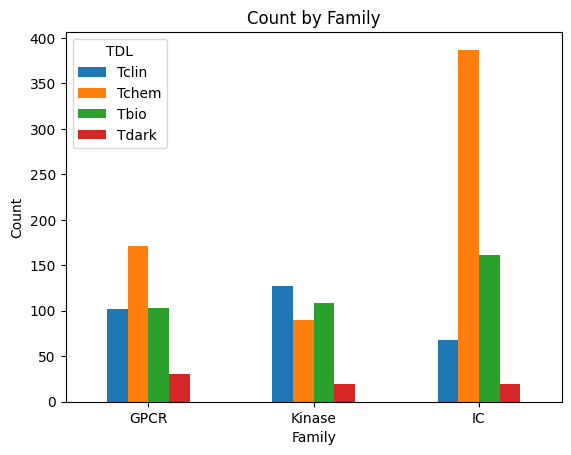

In [ ]:
columns_to_plot = df.columns[df.columns != 'Total']
label = ['GPCR', 'Kinase', 'IC']

# Plot the columns
df[columns_to_plot].plot(kind='bar')
plt.title('Count by Family')
plt.xlabel('Family')
plt.ylabel('Count')
plt.xticks(range(0, len(label)), label, rotation ='horizontal')
plt.show()

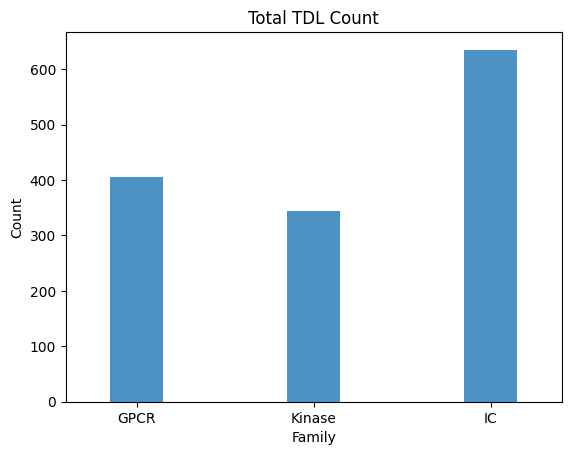

In [ ]:
label = ['GPCR', 'Kinase', 'IC']

plot = df['Total'].plot.bar(title="Total TDL Count", xlabel='Family', ylabel='Count', width=0.3, alpha=0.8)
plot = plt.xticks(range(0, len(label)), label, rotation ='horizontal')

#### TDLs for all 20412 TCRD Targets


In [ ]:
sql = '''
SELECT DISTINCT
    tdl AS "TDL",
    count(*) AS "Count"
FROM
    target
GROUP BY
    tdl;
'''
TDL = pd.read_sql(sql, dbcon)
TDL.head()

<ipython-input-12-8c01d381a24d>:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  TDL = pd.read_sql(sql, dbcon)


,TDL,Count
0,Tclin,704
1,Tchem,1971
2,Tbio,12058
3,Tdark,5679


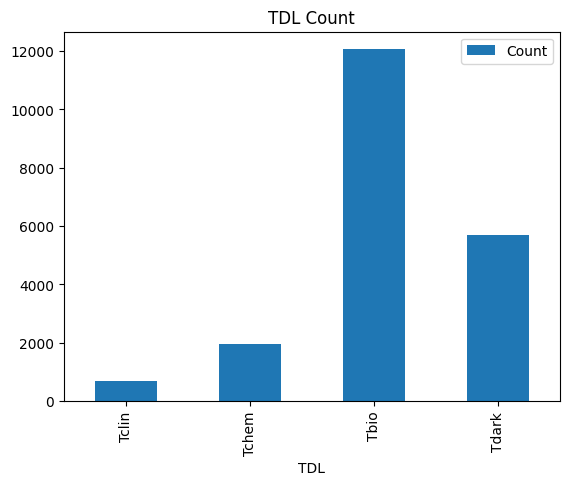

In [ ]:
plot = TDL.plot.bar(title="TDL Count", x='TDL')

### Fetch targets

In [ ]:
sql='''
SELECT
        target.id AS "target_id",
        target.name,
        target.fam,
        target.tdl,
        target.idg,
        protein.sym,
        protein.geneid,
        protein.uniprot,
        protein.stringid
FROM
        target
JOIN
  t2tc ON t2tc.target_id = target.id
JOIN
  protein ON protein.id = t2tc.protein_id
'''

tgts = pd.read_sql(sql, dbcon)
tgts.head()

<ipython-input-14-6706c05b5566>:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tgts = pd.read_sql(sql, dbcon)


,target_id,name,fam,tdl,idg,sym,geneid,uniprot,stringid
0,1,Cystathionine gamma-lyase,Enzyme,Tchem,0,CTH,1491.0,P32929,ENSP00000359976
1,2,Uncharacterized protein C7orf77,None,Tdark,0,C7orf77,154872.0,A4D0Y5,ENSP00000480627
2,3,Uncharacterized protein C8orf34,None,Tbio,0,C8orf34,116328.0,Q49A92,ENSP00000427820
3,4,CGG triplet repeat-binding protein 1,None,Tbio,0,CGGBP1,8545.0,Q9UFW8,ENSP00000381429
4,5,Uncharacterized protein C8orf76,None,Tdark,0,C8orf76,84933.0,Q96K31,ENSP00000276704


### Fetch desease

In [ ]:
sql = '''
SELECT
        d.dtype,
        dt.description dtype_description,
        d.name,
        d.did,
        d.mondoid,
        d.description,
        d.reference,
        d.drug_name,
        d.source,
        COUNT(d.protein_id) n_target_associations
FROM
        disease d
        JOIN disease_type dt ON dt.name = d.dtype
GROUP BY
        d.dtype,
        dt.description,
        d.name,
        d.did,
        d.mondoid,
        d.description,
        d.reference,
        d.drug_name,
        d.source
ORDER BY
        name
;
'''

disease = pd.read_sql(sql, dbcon)
disease.head()

<ipython-input-18-f7a27d6cf18a>:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  disease = pd.read_sql(sql, dbcon)


,dtype,dtype_description,name,did,mondoid,description,reference,drug_name,source,n_target_associations
0,DisGeNET,Currated disease associations from DisGeNET (h...,11-Beta-hydroxylase deficiency,UMLS:C3669121,None,None,None,None,CTD_human,1
1,DisGeNET,Currated disease associations from DisGeNET (h...,12q14 microdeletion syndrome,UMLS:C4305140,MONDO:0019784,None,None,None,ORPHANET,2
2,Monarch,Gene-Disease associations from Monarch that ha...,12q14 microdeletion syndrome,Orphanet:94063,MONDO:0019784,,None,None,None,2
3,DisGeNET,Currated disease associations from DisGeNET (h...,14q12 microdeletion syndrome,UMLS:C4305240,MONDO:0016833,None,None,None,ORPHANET,1
4,Monarch,Gene-Disease associations from Monarch that ha...,14q12 microdeletion syndrome,Orphanet:261144,MONDO:0016833,,None,None,None,1


## Fetch gene

In [ ]:
sql = '''
SELECT DISTINCT
    target.id AS "tcrdTargetId",
    target.name AS "tcrdTargetName",
    target.fam AS "tcrdTargetFamily",
    target.tdl AS "TDL",
    target.idg AS "idgList",
    protein.sym AS "geneSymbol",
    protein.geneid AS "ncbiGeneId",
    xref.value AS "ensemblGeneId"
FROM
    target
JOIN
    t2tc ON t2tc.target_id = target.id
JOIN
    protein ON protein.id = t2tc.protein_id
JOIN
    xref ON xref.protein_id = protein.id
WHERE
    xref.xtype = 'Ensembl' AND xref.value REGEXP '^ENSG'
ORDER BY
    protein.sym
        ;
'''

gene = pd.read_sql(sql, dbcon)
gene.head()

<ipython-input-16-99b758a4e6ec>:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  gene = pd.read_sql(sql, dbcon)


,tcrdTargetId,tcrdTargetName,tcrdTargetFamily,TDL,idgList,geneSymbol,ncbiGeneId,ensemblGeneId
0,15556,Alpha-1B-glycoprotein,None,Tbio,0,A1BG,1.0,ENSG00000121410
1,16113,APOBEC1 complementation factor,None,Tbio,0,A1CF,29974.0,ENSG00000148584
2,15605,Alpha-2-macroglobulin,None,Tbio,0,A2M,2.0,ENSG00000175899
3,15541,Alpha-2-macroglobulin-like protein 1,None,Tbio,0,A2ML1,144568.0,ENSG00000166535
4,16150,"Alpha-1,3-galactosyltransferase 2",None,Tdark,0,A3GALT2,127550.0,ENSG00000184389


## Ligands

A ligand is an ion or molecule with a functional group that binds to a central metal atom to form a coordination complex. Here the term ‘ligands’ includes small molecule and biologic drugs, as well as other therapeutic modalities and is not limited to small molecules that modulate proteins.

There are totally 355932 ligands in which 1782 are drugs.  

Drugs in the DrugCentral database are only approved drugs, meaning drugs which are approved by the US, European, or Japanese regulatory authorities.

The details of ligands and drugs such as structure, target activities are listed in pharos.
https://pharos.nih.gov/ligands

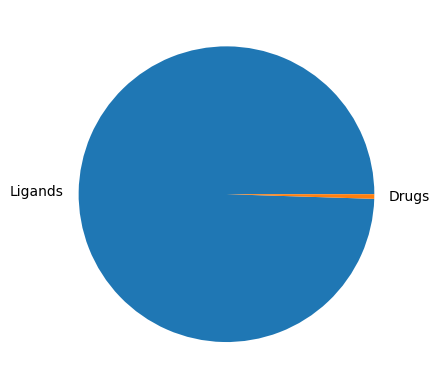

In [ ]:
chemicals = ['Ligands', 'Drugs']
count = [354150, 1782]

plot = plt.pie(count, labels = chemicals)